In [ ]:
# Place import statements here
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# DSCI6003 Lab - Gaussian Mixture Models

Similar to yesterday, we will be looking at Gaussian Mixture models and how it compares to other clustering algorithms. The goal for today is: 

1. Understand the algorithm behind Gaussian mixture models (and how it works).
2. Look at the different behaviour between GMM and KMeans. 
3. Experiment with using unsupervised techniques on supervised data. 

### Part 1: Implementing GMM
    1. Generate the data. We will use code to do that. Run the code sample below and produce a plot of the data. 
    2. Fit a GMM model to it. 
    3. Look at a plot of the silhouette score for varying values of n_components. What do you notice? 
    4. Plot the location of the centers (mean values).

### Part 2: Comparing to KMeans
    1. Notice that the class_weights variable is set to 0.6 (in the function call). Check the silhouette score for KMeans over various values for n_clusters. What is the optimal number of parameters? Compare it with the silhouette score for GMM. 
    2. Plot the centroids for the optimal parameter value. Where are they placed? Is it similar to the mean values for GMM? 
    3. Now change the class_weights variable to a valued such as 21. How does this change the plot? 
    4. With this new sample dataset, get the silhouette score for KMeans and GMM. What do you notice about the optimal parameters? Did they change? 
    5. Plot the centroids for n_components and n_clusters being 2. How do they differ between GMM and KMeans 

### Part 3: Experimenting on Supervised Data
    1. Load the iris dataset from sklearn. 
    2. Do a train/test split on your data using random_state = 123412.
    3. Run a GMM on it. What accuracy score do you get? 
    4. Run KMeans on it. What score do you get? 
    5. Run a Random Forest on it. What score do you get? 
    
    Note: You might have to run the cell a few times to get the optimal score (since 0,1,2 labels are randomly given in the unsupervised cases).

In [211]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

Populating the interactive namespace from numpy and matplotlib


Part 1: Implementing GMM
1. Generate the data. We will use code to do that. Run the code sample below and produce a plot of the data. 
2. Fit a GMM model to it. 
3. Look at a plot of the silhouette score for varying values of n_components. What do you notice? 
4. Plot the location of the centers (mean values).

0.00632453617818


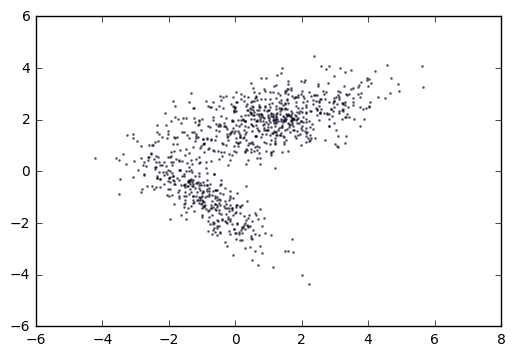

In [113]:
def q(x, y, weights):
    g1 = mlab.bivariate_normal(x, y, 1.0, 1.0, -1, -1, -0.8)
    g2 = mlab.bivariate_normal(x, y, 1.5, 0.8, 1, 2, 0.6)
    return weights*g1+28.4*g2/(weights+28.4)

def sample(class_weights):
    N = 10000
    s = 10
    r = np.zeros(2)
    p = q(r[0], r[1], class_weights)
    print(p)
    samples = []
    for i in range(N):
        rn = r + np.random.normal(size=2)
        pn = q(rn[0], rn[1],class_weights)
        if pn >= p:
            p = pn
            r = rn
        else:
            u = np.random.rand()
            if u < pn/p:
                p = pn
                r = rn
        if i % s == 0:
            samples.append(r)

    samples = np.array(samples)
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, s=1)
    return samples

s = sample(0.6)


In [67]:
GMM_2 = GaussianMixture(n_components=2).fit(s)
GMM_2.means_

array([[-0.98235916, -1.04013139],
       [ 1.14996488,  2.0716723 ]])

In [62]:
def gaussianmixture(n_compons,data):
    

    GMM_2 = GaussianMixture(n_components=n_compons).fit(data)

    predictions_2 = GMM_2.predict(data)
    plt.scatter(data[:,0],data[:,1],c=predictions_2)
    plt.title('{} Cluster(s)'.format(n_compons));

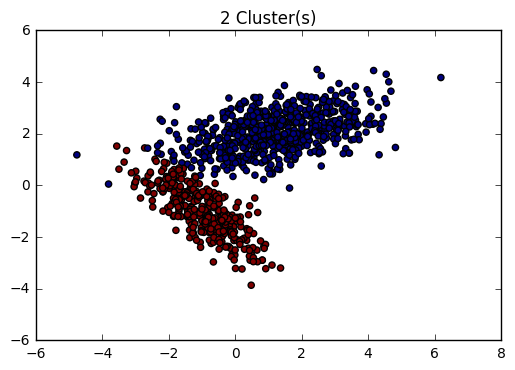

In [64]:
gaussianmixture(2,s)

In [119]:
def plot_silhouette_gmm(data,clusters):
    '''
    Input:
        data - (DataFrame) Data to cluster on
        clusters - (list) List containing the number of clusters to check for
    Output:
        Plot showing the silhouette score for different numbers of centroids
    '''
    data = np.array(data)
    gmm_model = GaussianMixture(n_components=clusters).fit(data)
    
    predictions = gmm_model.predict(data)

    
    return silhouette_score(data,predictions)
            

    
    

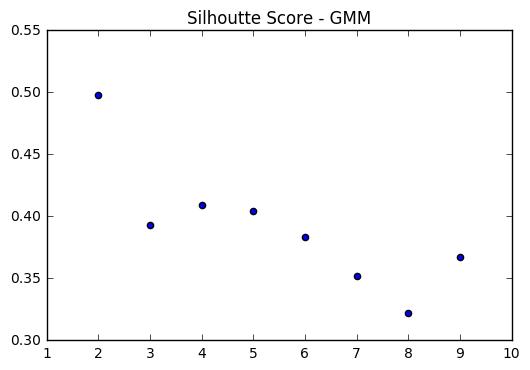

In [121]:
plt.scatter(range(2,10),[plot_silhouette_gmm(s,i) for i in range(2,10)])
plt.title('Silhoutte Score - GMM');


- Max Silhoutte score at 2 clusters for this generated data.

In [126]:
def plot_centroids_gmm(data,clusters,labels=None,c='white'):
    '''
    Input:
        data - (DataFrame) Data to cluster on
        labels - (list) List containing the labels for each datapoint
    Output:
        Plot showing the original datapoints and cluster centers found by KMeans
    '''
    
    gmm_model = GaussianMixture(n_components=clusters).fit(data)
    cluster_centers = gmm_model.means_
    predictions = gmm_model.predict(data)
    print('Cluster Centers:',cluster_centers)
    plt.figure()
    for center in cluster_centers:
        plt.plot(center[0],center[1],marker='x',markersize=10,linewidth=15.0,color=c)
    plt.scatter(data[:,0],data[:,1],c=predictions)
    plt.title('Centroids')
    
    

        


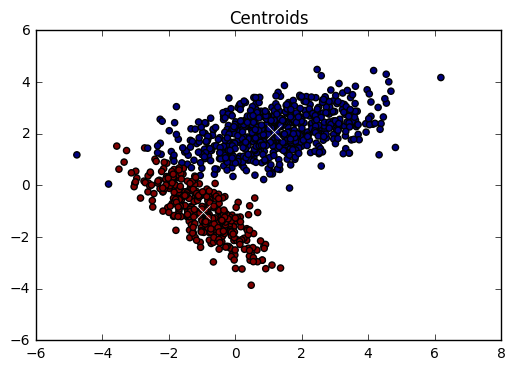

In [76]:
plot_centroids_gmm(s,2)


Part 2: Comparing to KMeans

1. Notice that the class_weights variable is set to 0.6 (in the function call). Check the silhouette score for KMeans over various values for n_clusters. What is the optimal number of parameters? Compare it with the silhouette score for GMM. 
2. Plot the centroids for the optimal parameter value. Where are they placed? Is it similar to the mean values for GMM? 
3. Now change the class_weights variable to a valued such as 21. How does this change the plot? 
4. With this new sample dataset, get the silhouette score for KMeans and GMM. What do you notice about the optimal parameters? Did they change? 
5. Plot the centroids for n_components and n_clusters being 2. How do they differ between GMM and KMeans

In [94]:
def plot_centroids_knn(data,clusters,labels=None):
    '''
    Input:
        data - (DataFrame) Data to cluster on
        labels - (list) List containing the labels for each datapoint
    Output:
        Plot showing the original datapoints and cluster centers found by KMeans
    '''
    
    kmeans_model = KMeans(n_clusters=clusters).fit(data)
    cluster_centers = kmeans_model.cluster_centers_
    predictions = kmeans_model.predict(data)
    plt.figure()
    print('Cluster Centers:',cluster_centers)
    
    for center in cluster_centers:
        plt.plot(center[0],center[1],marker='x',markersize=10,linewidth=15.0,color='white')
    plt.scatter(data[:,0],data[:,1],c=predictions)
    
    

        


In [80]:
def plot_silhouette_knn(data,clusters):
    '''
    Input:
        data - (DataFrame) Data to cluster on
        clusters - (list) List containing the number of clusters to check for
    Output:
        Plot showing the silhouette score for different numbers of centroids
    '''
    data = np.array(data)
    kmeans_model = KMeans(n_clusters=clusters).fit(data)
    cluster_centers = kmeans_model.cluster_centers_
    
    predictions = kmeans_model.predict(data)
    
    
    return silhouette_score(data,predictions)
            

    
    

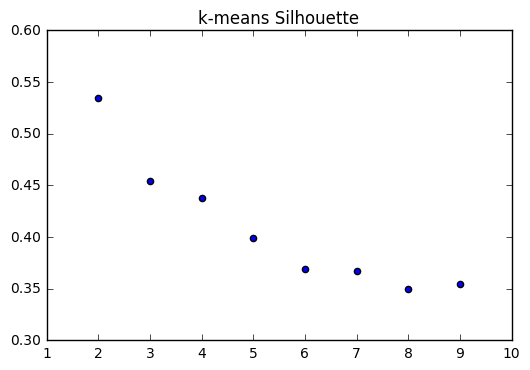

In [85]:
plt.scatter(range(2,10),[plot_silhouette_knn(s,i) for i in range(2,10)])
plt.title('k-means Silhouette');

- K-means also predicts two clusters as the best cluster score

Cluster Centers: [[ 1.50520352  2.22675466]
 [-0.99847615 -0.60681793]]


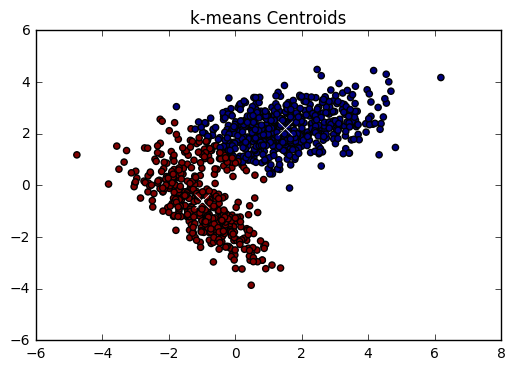

In [96]:
plot_centroids_knn(s,2)
plt.title('k-means Centroids');

Cluster Centers: [[-0.98235916 -1.04013139]
 [ 1.14996488  2.0716723 ]]


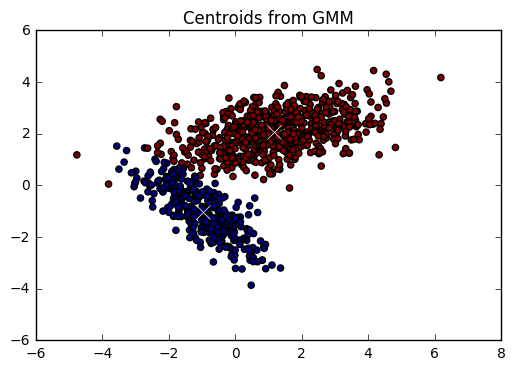

In [97]:
plot_centroids_gmm(s,2)
plt.title('Centroids from GMM')

- The centers, and partions, for the K-means vs GMM are different. GMM has a better boundary for each cluster. In addition, the centers are further to the right for the top mean and further to the left for the bottom cluster.

###### Now change the class_weights variable to a valued such as 21. How does this change the plot?

0.0406164659959


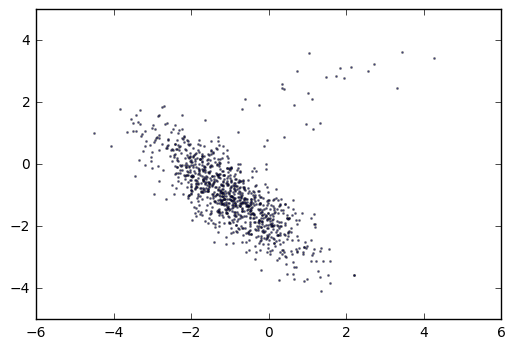

In [115]:
new_data = sample(21)

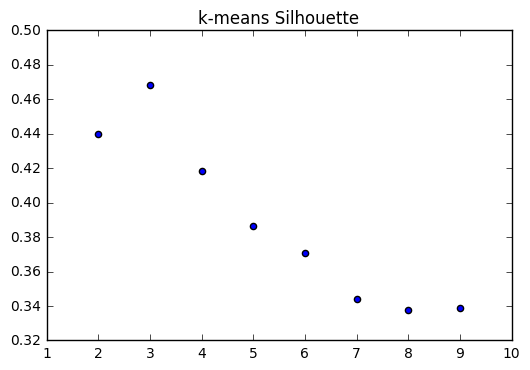

In [116]:
plt.scatter(range(2,10),[plot_silhouette_knn(new_data,i) for i in range(2,10)])
plt.title('k-means Silhouette');

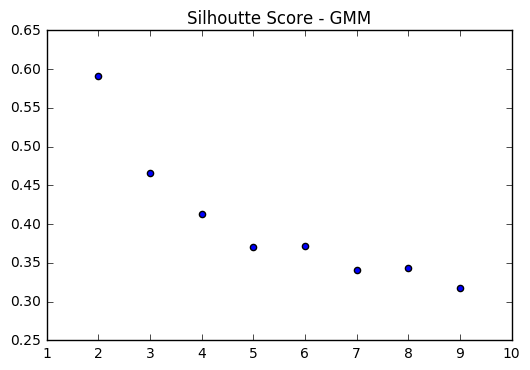

In [122]:
plt.scatter(range(2,10),[plot_silhouette_gmm(new_data,i) for i in range(2,10)])
plt.title('Silhoutte Score - GMM');


- With a class weight of 21, k-means thinks there should be three classes while GMM still thinks there should be two clusters.

Cluster Centers: [[-0.29431618 -1.78074309]
 [-1.60040907 -0.03200752]]


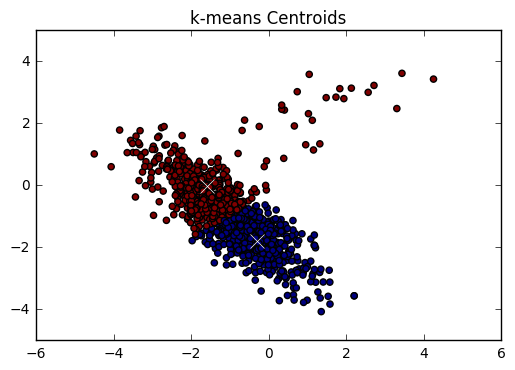

In [129]:
plot_centroids_knn(new_data,2)
plt.title('k-means Centroids');

Cluster Centers: [[ 0.54890838  1.87588204]
 [-0.99898703 -1.01102697]]


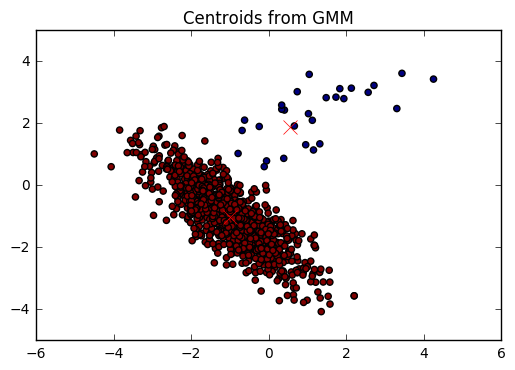

In [128]:
plot_centroids_gmm(new_data,2,c='red')
plt.title('Centroids from GMM')

- Here, we can see a large difference in how the clusters are calculated given the optimal number of parameters for each model. In addition, k-means predicts three classes while GMM has two classes.

2. Plot the centroids for the optimal parameter value. Where are they placed? Is it similar to the mean values for GMM? 
3. Now change the class_weights variable to a valued such as 21. How does this change the plot? 
4. With this new sample dataset, get the silhouette score for KMeans and GMM. What do you notice about the optimal parameters? Did they change? 
5. Plot the centroids for n_components and n_clusters being 2. How do they differ between GMM and KMeans

- 1) The centers are vastly different now. K-means has three clusters while GMM has two-clusters.

- 2) The data is more spread out now for one of the clusters.
- 3) Optimal parameters are 2 for GMM and 3 for K-means
- 4) K-means plots the two means in the same part of the graph. GMM can recognize the two dispersion sections and identifies two separate clusters.

# Part 3: Experimenting on Supervised Data¶
1. Load the iris dataset from sklearn. 
2. Do a train/test split on your data using random_state = 123412.
3. Run a GMM on it. What accuracy score do you get? 
4. Run KMeans on it. What score do you get? 
5. Run a Random Forest on it. What score do you get? 

Note: You might have to run the cell a few times to get the optimal score (since 0,1,2 labels are randomly given in the unsupervised cases).

In [137]:
data_iris,target_iris=load_iris(True)

In [138]:
X_train, X_test, y_train, y_test =train_test_split(data_iris,target_iris,random_state=123412)

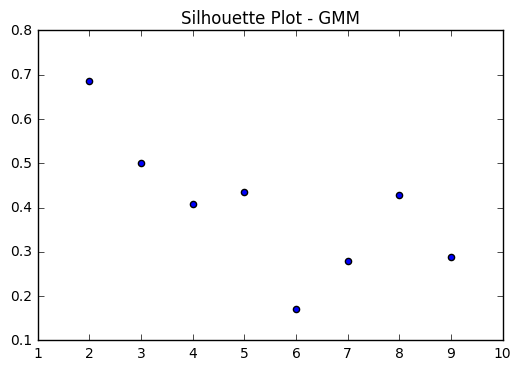

In [147]:
plt.scatter(range(2,10),[plot_silhouette_gmm(data_iris,i) for i in range(2,10)])
plt.title('Silhouette Plot - GMM')

- It seems like two clusters is the optimal number here. However, we know that there are three classes in our data, so we will use three.


In [262]:
accuracy_gmm = []
for i in range(10):
    gmm_2 = GaussianMixture(3,covariance_type='tied',max_iter=1000).fit(X_train,y_train)
    print('Your accuracy for GMM for Iris is {:.2%}'.format(accuracy_score(y_test,gmm_2.predict(X_test))))
    accuracy_gmm.append(accuracy_score(y_test,gmm_2.predict(X_test)))
print('Max accuracy for GMM is {:.2%}'.format(max(accuracy_gmm)))
print()
accuracy_kmeans = []
for i in range(10):    
    k_means = KMeans(3,max_iter=1000).fit(X_train,y_train)
    print('Your accuracy for Kmeans for Iris is {:.2%}'.format(accuracy_score(y_test,k_means.predict(X_test))))
    accuracy_kmeans.append(accuracy_score(y_test,k_means.predict(X_test)))
print('Max accuracy for Kmeans is {:.2%}'.format(max(accuracy_gmm)))
print()
accuracy_rf = []
for i in range(10):
    rf = RandomForestClassifier(10).fit(X_train,y_train)
    print('Your accuracy for RF for Iris is {:.2%}'.format(accuracy_score(y_test,rf.predict(X_test))))
    accuracy_rf.append(accuracy_score(y_test,rf.predict(X_test)))

print('Average accuracy for Kmeans is {:.2%}'.format(max(accuracy_rf)))


Your accuracy for GMM for Iris is 0.00%
Your accuracy for GMM for Iris is 28.95%
Your accuracy for GMM for Iris is 28.95%
Your accuracy for GMM for Iris is 0.00%
Your accuracy for GMM for Iris is 28.95%
Your accuracy for GMM for Iris is 100.00%
Your accuracy for GMM for Iris is 31.58%
Your accuracy for GMM for Iris is 31.58%
Your accuracy for GMM for Iris is 0.00%
Your accuracy for GMM for Iris is 28.95%
Max accuracy for GMM is 100.00%

Your accuracy for Kmeans for Iris is 34.21%
Your accuracy for Kmeans for Iris is 34.21%
Your accuracy for Kmeans for Iris is 26.32%
Your accuracy for Kmeans for Iris is 94.74%
Your accuracy for Kmeans for Iris is 26.32%
Your accuracy for Kmeans for Iris is 94.74%
Your accuracy for Kmeans for Iris is 26.32%
Your accuracy for Kmeans for Iris is 5.26%
Your accuracy for Kmeans for Iris is 94.74%
Your accuracy for Kmeans for Iris is 5.26%
Max accuracy for Kmeans is 100.00%

Your accuracy for RF for Iris is 97.37%
Your accuracy for RF for Iris is 97.37%
Your 